In [1]:
from AGSRNet_source.preprocessing import *
from AGSRNet_source.model import *
from AGSRNet_source.train import *

from data_preparation import load_data_tensor

from sklearn.model_selection import KFold

In [2]:
# get the data
lr_train, lr_test, hr_train = load_data_tensor('data')

# lr_train: training input x_train
# hr_train: training target y_train
# lr_test: test input x_test

In [3]:
print(f'lr_train: {type(lr_train)}, lr_test: {type(lr_test)}, hr_train: {type(hr_train)}')
print(f'lr_train: {lr_train.shape}, lr_test: {lr_test.shape}, hr_train: {hr_train.shape}')

lr_train: <class 'torch.Tensor'>, lr_test: <class 'torch.Tensor'>, hr_train: <class 'torch.Tensor'>
lr_train: torch.Size([167, 160, 160]), lr_test: torch.Size([112, 160, 160]), hr_train: torch.Size([167, 268, 268])


In [4]:
lr_train[0].numpy()

array([[0.        , 0.33881718, 0.20248583, ..., 0.67018974, 0.3993646 ,
        0.12178811],
       [0.33881718, 0.        , 0.03983874, ..., 0.58988833, 0.        ,
        0.34501475],
       [0.20248583, 0.03983874, 0.        , ..., 0.32471067, 0.16564856,
        0.00650767],
       ...,
       [0.67018974, 0.58988833, 0.32471067, ..., 0.        , 0.26329526,
        0.25529164],
       [0.3993646 , 0.        , 0.16564856, ..., 0.26329526, 0.        ,
        0.18337432],
       [0.12178811, 0.34501475, 0.00650767, ..., 0.25529164, 0.18337432,
        0.        ]], dtype=float32)

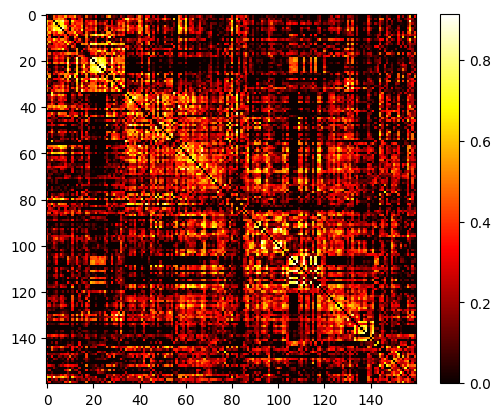

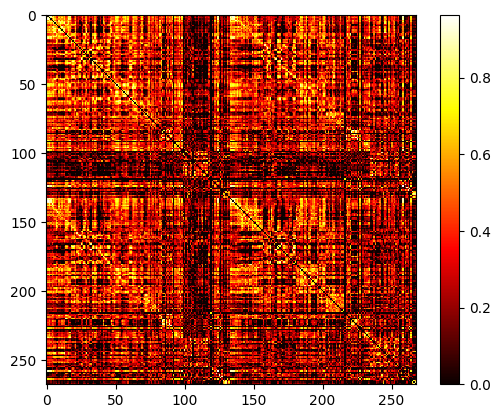

In [5]:
# plotting the LR and target HR matrix for 1 sample/participant (index=0)
plt.imshow(lr_train[0], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(hr_train[0], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [5]:
# unnecessary, but just to be consistent with the AGSR-Net repo

# actual data
subjects_adj, subjects_ground_truth, test_adj, test_ground_truth = \
    lr_train, hr_train, lr_test, None  # we don't have the test labels, right?


# simulated data from the AGSR-Net repo 
# subjects_adj = np.random.normal(0.5, 1, (190, 160, 160))
# test_adj = np.random.normal(0.5, 1, (87, 160, 160))
# subjects_ground_truth = np.random.normal(0.5, 1, (190, 268, 268))
# test_ground_truth = np.random.normal(0.5, 1, (87, 268, 268))

In [3]:
# create the model
ks = [0.9, 0.7, 0.6, 0.5]

# default values from demo.py in the GitHub repo:
# https://github.com/basiralab/AGSR-Net/blob/master/demo.py
# args = {
#     'epochs': 200,
#     'lr': 0.0001,
#     'lmbda': 0.1,
#     'lr_dim': 160,
#     'hr_dim': 320,
#     'hidden_dim': 320,
#     'padding': 26,
#     'mean_dense': 0.,
#     'std_dense': 0.01,
#     'mean_gaussian': 0.,
#     'std_gaussian': 0.1
# }

class ModelArgs:  # instead of using arg parser, so that this works with AGSRNet class
    def __init__(self, epochs, lr, splits, lmbda, lr_dim, hr_dim, hidden_dim,
                 padding, mean_dense, std_dense, mean_gaussian, std_gaussian):
        self.epochs = epochs
        self.lr = lr
        self.splits = splits
        self.lmbda = lmbda
        self.lr_dim = lr_dim
        self.hr_dim = hr_dim
        self.hidden_dim = hidden_dim
        self.padding = padding
        self.mean_dense = mean_dense
        self.std_dense = std_dense
        self.mean_gaussian = mean_gaussian
        self.std_gaussian = std_gaussian

# default arguments
args = ModelArgs(
    epochs=200,
    lr=0.0001,
    splits=3,
    lmbda=0.1,
    lr_dim=160,
    hr_dim=320,
    hidden_dim=320,
    padding=26,
    mean_dense=0.,
    std_dense=0.01,
    mean_gaussian=0.,
    std_gaussian=0.1
)

model = AGSRNet(ks, args)
print(model)

AGSRNet(
  (layer): GSRLayer()
  (net): GraphUnet(
    (start_gcn): GCN(
      (proj): Linear(in_features=160, out_features=320, bias=True)
      (drop): Dropout(p=0, inplace=False)
    )
    (bottom_gcn): GCN(
      (proj): Linear(in_features=320, out_features=320, bias=True)
      (drop): Dropout(p=0, inplace=False)
    )
    (end_gcn): GCN(
      (proj): Linear(in_features=640, out_features=320, bias=True)
      (drop): Dropout(p=0, inplace=False)
    )
  )
  (gc1): GraphConvolution()
  (gc2): GraphConvolution()
)


In [8]:
# train the model
#train(model, subjects_adj.numpy(), subjects_ground_truth.numpy(), args)

In [9]:
# test the model
# test(model, test_adj, test_ground_truth, args)

In [8]:
X, Y = lr_train, hr_train


In [9]:
cv = KFold(n_splits=args.splits, random_state=42, shuffle=True)
X, Y = lr_train, hr_train

def train_model():
    for train_index, test_index in cv.split(X):
        subjects_adj, test_adj, subjects_ground_truth, test_ground_truth = \
            X[train_index], X[test_index], Y[train_index], Y[test_index]
        train(model, subjects_adj, subjects_ground_truth, args)
        test(model, test_adj, test_ground_truth, args)

train_model()

Discriminator(
  (dense_1): Dense()
  (relu_1): ReLU()
  (dense_2): Dense()
  (relu_2): ReLU()
  (dense_3): Dense()
  (sigmoid): Sigmoid()
)
Epoch:  0 Loss:  8.070217218484965 Error:  714.8307298788347 %
Epoch:  1 Loss:  4.118695015305871 Error:  7.760683353151288 %
Epoch:  2 Loss:  7.216192713728896 Error:  7.427751548118419 %
Epoch:  3 Loss:  9.273467557924288 Error:  7.212357421044831 %
Epoch:  4 Loss:  10.760924463873511 Error:  7.122758400064331 %
Epoch:  5 Loss:  11.833260802535323 Error:  7.033076133948189 %
Epoch:  6 Loss:  12.639151513039529 Error:  6.931540584779 %
Epoch:  7 Loss:  13.406139339412654 Error:  6.853768407358779 %
Epoch:  8 Loss:  14.167278126553372 Error:  6.791199609503015 %
Epoch:  9 Loss:  14.732636451721191 Error:  6.675354676606419 %
Epoch:  10 Loss:  15.21504629839648 Error:  6.587472527816489 %
Epoch:  11 Loss:  15.48824016467945 Error:  6.466284404332573 %
Epoch:  12 Loss:  15.91547491743758 Error:  6.4083310162967395 %
Epoch:  13 Loss:  16.328876624236

In [4]:
saved_state_dict = torch.load('/vol/bitbucket/km2120/DGL_Project/DGL24-Group-Project/AGSR_models/vanilla_model_corrected.pth')

In [5]:
model.load_state_dict(saved_state_dict, strict=True)

<All keys matched successfully>

In [11]:
from evaluations import *

In [6]:
preds_list = []
model.eval()
with torch.no_grad():
    for test_data in lr_test:
        pred, _, _, _ = model(test_data, args.lr_dim, args.hr_dim)
        pred = unpad(pred, args.padding)
        preds_list.append(pred)
        
pred_tensor = torch.stack(preds_list)

In [7]:
pred_tensor.size()

torch.Size([112, 268, 268])

In [8]:
pred_tensor

tensor([[[1.0000e+00, 2.3284e-01, 1.9895e-01,  ..., 1.1230e-03,
          4.9380e-02, 5.3411e-02],
         [2.3284e-01, 1.0000e+00, 5.0191e-01,  ..., 3.9508e-02,
          1.1288e-01, 1.1045e-01],
         [1.9895e-01, 5.0191e-01, 1.0000e+00,  ..., 7.9474e-03,
          2.0382e-02, 5.9493e-03],
         ...,
         [1.1230e-03, 3.9508e-02, 7.9474e-03,  ..., 1.0000e+00,
          6.1751e-01, 2.7710e-01],
         [4.9380e-02, 1.1288e-01, 2.0382e-02,  ..., 6.1751e-01,
          1.0000e+00, 5.6474e-01],
         [5.3411e-02, 1.1045e-01, 5.9493e-03,  ..., 2.7710e-01,
          5.6474e-01, 1.0000e+00]],

        [[1.0000e+00, 5.3537e-01, 7.5793e-01,  ..., 1.1265e-01,
          5.6490e-02, 1.6218e-01],
         [5.3537e-01, 1.0000e+00, 6.0246e-01,  ..., 3.9362e-02,
          5.8635e-02, 1.0774e-01],
         [7.5793e-01, 6.0246e-01, 1.0000e+00,  ..., 1.2480e-01,
          4.5393e-02, 1.3275e-01],
         ...,
         [1.1265e-01, 3.9362e-02, 1.2480e-01,  ..., 1.0000e+00,
          5.836

In [16]:
evaluate(pred_tensor, hr_train)

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

108

109

110

111

MAE:  0.1577066
PCC:  0.5000482742731664
Jensen-Shannon Distance:  0.32242290242472565
Average MAE betweenness centrality: 0.022012196407023406
Average MAE eigenvector centrality: 0.018109288065911944
Average MAE PageRank centrality: 0.0007713828172833663


In [12]:
from data_preparation import *

In [13]:
def find_preds_and_convert_to_submission(file_name, model=model, test_set=lr_test):
    preds_list = []
    with torch.no_grad():
        for test_data in test_set:
            pred, _, _, _ = model(test_data, args.lr_dim, args.hr_dim)
            pred = unpad(pred, args.padding)
            preds_list.append(pred)
    pred_tensor = torch.stack(preds_list).numpy()
    generate_submission_file(pred_tensor, f'/vol/bitbucket/km2120/DGL_Project/DGL24-Group-Project/submission_files/{file_name}')        

In [14]:
find_preds_and_convert_to_submission('AGSR_Net_vanilla_corrected.csv')